# Add extra column with linear parameters to Planck chains

This notebook shows how to read a chain from Planck, and compute linear power parameters for each point in the chain.

Actually, the code is fairly slow, so it only does this for a handful of points in the chain. 

Heavier work is done in a  normal script.

In [1]:
import numpy as np
from getdist import plots
from cup1d.planck import planck_chains
from cup1d.planck import add_linP_params
# because of black magic, the order of the imports here matters
%matplotlib inline

### Read default Planck 2018 chain

chain name = base_mnu_plikHM_TT_lowl_lowE


((0.2623069062917064, 0.5412635937082936),
 (2.971244986653956, 3.1070790133460444))

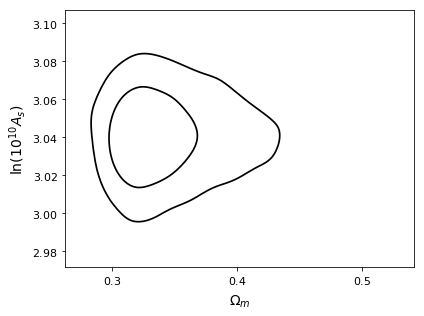

In [2]:
planck2018=planck_chains.get_planck_2018()
g = plots.getSinglePlotter()
g.plot_2d(planck2018['samples'], ['omegam', 'logA'])

In [3]:
# dramatically reduce sice of chain, for testing
samples=planck2018['samples'].copy()
thinning=20000
samples.thin(thinning)
Nsamp=len(samples.weights)
print('will use %d samples'%Nsamp)

will use 6 samples


### For each element in the chain, compute setup CAMB object and compute linear power parameters

In [4]:
linP_params=[]
for i in range(Nsamp):
    verbose=(i%1==0)
    if verbose: print('sample point',i)
    params=samples.getParamSampleDict(i)
    linP_params.append(add_linP_params.get_linP_params(params,verbose=verbose))

sample point 0
H0 = 6.7268E+01, Omega_bc = 3.1540E-01, A_s = 2.1223E-09, n_s = 9.5905E-01, alpha_s = 0.0000E+00
sample point 1
H0 = 6.6965E+01, Omega_bc = 3.1578E-01, A_s = 2.0724E-09, n_s = 9.6618E-01, alpha_s = 0.0000E+00
sample point 2
H0 = 6.6707E+01, Omega_bc = 3.2605E-01, A_s = 2.0992E-09, n_s = 9.6317E-01, alpha_s = 0.0000E+00
sample point 3
H0 = 6.4578E+01, Omega_bc = 3.4889E-01, A_s = 2.0533E-09, n_s = 9.5319E-01, alpha_s = 0.0000E+00
sample point 4
H0 = 6.8713E+01, Omega_bc = 2.9031E-01, A_s = 2.0718E-09, n_s = 9.7606E-01, alpha_s = 0.0000E+00
sample point 5
H0 = 6.6067E+01, Omega_bc = 3.2960E-01, A_s = 2.1047E-09, n_s = 9.6457E-01, alpha_s = 0.0000E+00


In [5]:
# setup numpy arrays with linP parameters
linP_DL2_star=np.array([linP_params[i]['Delta2_star'] for i in range(Nsamp)])
linP_n_star=np.array([linP_params[i]['n_star'] for i in range(Nsamp)])
linP_alpha_star=np.array([linP_params[i]['alpha_star'] for i in range(Nsamp)])
linP_f_star=np.array([linP_params[i]['f_star'] for i in range(Nsamp)])
linP_g_star=np.array([linP_params[i]['g_star'] for i in range(Nsamp)])

In [6]:
# add new derived linP parameters 
samples.addDerived(linP_DL2_star,'linP_DL2_star',label='Ly\\alpha \\, \\Delta_\\ast')
samples.addDerived(linP_n_star,'linP_n_star',label='Ly\\alpha \\, n_\\ast')
samples.addDerived(linP_alpha_star,'linP_alpha_star',label='Ly\\alpha \\, \\alpha_\\ast')
samples.addDerived(linP_f_star,'linP_f_star',label='Ly\\alpha \\, f_\\ast')
samples.addDerived(linP_g_star,'linP_g_star',label='Ly\\alpha \\, g_\\ast')

In [7]:
# get basic statistics for the new parameters
param_means=np.mean(samples.samples,axis=0)
param_vars=np.var(samples.samples,axis=0)
print('DL2_star mean = {} +/- {}'.format(param_means[88],np.sqrt(param_vars[88])))
print('n_star mean = {} +/- {}'.format(param_means[89],np.sqrt(param_vars[89])))
print('alpha_star mean = {} +/- {}'.format(param_means[90],np.sqrt(param_vars[90])))
print('f_star mean = {} +/- {}'.format(param_means[91],np.sqrt(param_vars[91])))
print('g_star mean = {} +/- {}'.format(param_means[92],np.sqrt(param_vars[92])))

DL2_star mean = 0.3493593545430808 +/- 0.015455174066833466
n_star mean = -2.3009840480504287 +/- 0.004130845679713867
alpha_star mean = -0.21627228689621558 +/- 0.0018091101287907704
f_star mean = 0.9780118754449193 +/- 0.0023161996832958384
g_star mean = 0.9685346319724037 +/- 0.0025651822829662256


### Write extended chains to file

In [8]:
new_root='./test_linP'
if (thinning > 1.0):
    new_root+='_'+str(thinning)
print('new root',new_root)
samples.saveAsText(root=new_root,make_dirs=True)

new root ./test_linP_20000


In [9]:
# Try reading the new file
from getdist import loadMCSamples
new_samples = loadMCSamples(new_root)
# get basic statistics for the new parameters
new_param_means=np.mean(new_samples.samples,axis=0)
new_param_vars=np.var(new_samples.samples,axis=0)
print('old DL2_star mean = {} +/- {}'.format(param_means[88],np.sqrt(param_vars[88])))
print('new DL2_star mean = {} +/- {}'.format(new_param_means[88],np.sqrt(new_param_vars[88])))

./test_linP_20000.txt
Removed no burn in
old DL2_star mean = 0.3493593545430808 +/- 0.015455174066833466
new DL2_star mean = 0.3493593545 +/- 0.015455174126208733
